In [23]:
import pandas as pd
# Load the dataset
file_path = 'Final_data_file.csv'  # Update the path accordingly
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,Year,Denmark_Public_Debt_Pc_of_GDP,Ireland_Public_Debt_Pc_of_GDP,United Kingdom_Public_Debt_Pc_of_GDP,Denmark_Inflation,United Kingdom_Inflation,Ireland_Inflation,Denmark_GDP,United Kingdom_GDP,Ireland_GDP
0,1970,7.62,41.65,73.24,6.514841,6.366568,8.207190,1.596842,4.308886,3.469886
1,1971,7.72,39.85,65.55,5.869870,9.444837,8.961749,3.004996,3.504717,3.469886
2,1972,6.64,37.34,62.04,6.562361,7.071098,8.605817,3.929385,4.321668,6.489808
3,1973,5.85,35.09,54.56,9.303383,9.196033,11.414850,4.092946,6.523848,4.721428
4,1974,5.08,43.45,51.60,15.275206,16.044011,16.976127,-1.122394,-2.484404,4.260231


In [24]:
#Moving the target variable to the start of the dataframe
data.insert(1, 'Ireland_Public_Debt_Pc_of_GDP2', data['Ireland_Public_Debt_Pc_of_GDP'])
data.drop(columns=['Ireland_Public_Debt_Pc_of_GDP'], inplace=True)
data.rename(columns={'Ireland_Public_Debt_Pc_of_GDP2': 'Ireland_Public_Debt_Pc_of_GDP'}, inplace=True)

data.head()

,Year,Ireland_Public_Debt_Pc_of_GDP,Denmark_Public_Debt_Pc_of_GDP,United Kingdom_Public_Debt_Pc_of_GDP,Denmark_Inflation,United Kingdom_Inflation,Ireland_Inflation,Denmark_GDP,United Kingdom_GDP,Ireland_GDP
0,1970,41.65,7.62,73.24,6.514841,6.366568,8.207190,1.596842,4.308886,3.469886
1,1971,39.85,7.72,65.55,5.869870,9.444837,8.961749,3.004996,3.504717,3.469886
2,1972,37.34,6.64,62.04,6.562361,7.071098,8.605817,3.929385,4.321668,6.489808
3,1973,35.09,5.85,54.56,9.303383,9.196033,11.414850,4.092946,6.523848,4.721428
4,1974,43.45,5.08,51.60,15.275206,16.044011,16.976127,-1.122394,-2.484404,4.260231


In [25]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [28]:
#data['Year'] = pd.to_datetime(data['Year'])
train_dates = (data['Year'])

In [29]:
print(train_dates)

0     1970
1     1971
2     1972
3     1973
4     1974
5     1975
6     1976
7     1977
8     1978
9     1979
10    1980
11    1981
12    1982
13    1983
14    1984
15    1985
16    1986
17    1987
18    1988
19    1989
20    1990
21    1991
22    1992
23    1993
24    1994
25    1995
26    1996
27    1997
28    1998
29    1999
30    2000
31    2001
32    2002
33    2003
34    2004
35    2005
36    2006
37    2007
38    2008
39    2009
40    2010
41    2011
42    2012
43    2013
44    2014
45    2015
Name: Year, dtype: int64


In [30]:
cols = list(data)[1:10]

In [31]:
print(cols)

['Ireland_Public_Debt_Pc_of_GDP', 'Denmark_Public_Debt_Pc_of_GDP', 'United Kingdom_Public_Debt_Pc_of_GDP', 'Denmark_Inflation', 'United Kingdom_Inflation', 'Ireland_Inflation', 'Denmark_GDP', 'United Kingdom_GDP', 'Ireland_GDP']


In [32]:
df_for_training = data[cols].astype(float)

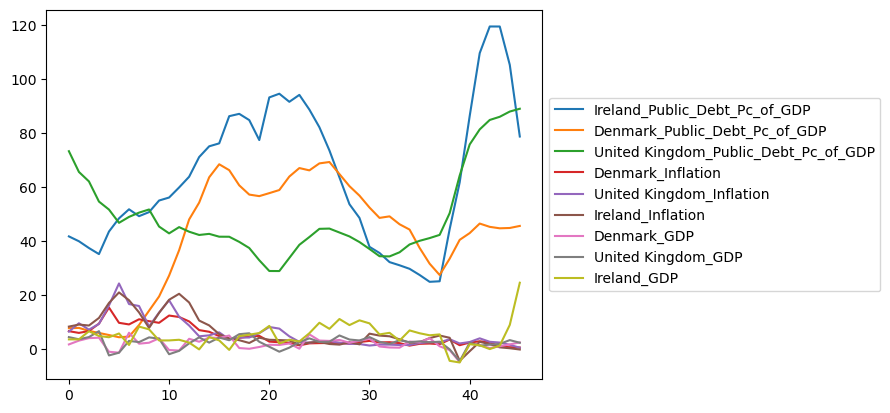

In [33]:
df_for_plot=df_for_training

ax = df_for_plot.plot.line()

# Move the legend to the side
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

In [34]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [35]:
trainX = []
trainY = []

n_future = 1
n_past = 7

for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    trainX.append(df_for_training_scaled[i-n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i+n_future - 1:i+n_future,0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape =={}.'.format(trainX.shape))
print('trainY shape =={}.'.format(trainY.shape))

trainX shape ==(39, 7, 9).
trainY shape ==(39, 1).


In [72]:
print(trainY[0,:])

[-0.56913319]


In [55]:
arr = np.array([[1, 2, 3], [4, 5, 6]])

In [61]:
print(arr[:])

[[1 2 3]
 [4 5 6]]


In [68]:
print(arr[0:4,2:3])

[[3]
 [6]]


In [36]:
model = Sequential()
model.add(LSTM(64,activation = 'relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32,activation='relu',return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 7, 64)             18944     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 31393 (122.63 KB)
Trainable params: 31393 (122.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.1)

Epoch 1/10
3/3 [==============================] - 4s 420ms/step - loss: 0.8300 - val_loss: 3.0966
Epoch 2/10
3/3 [==============================] - 0s 31ms/step - loss: 0.7794 - val_loss: 2.9857
Epoch 3/10
3/3 [==============================] - 0s 36ms/step - loss: 0.7296 - val_loss: 2.9228
Epoch 4/10
3/3 [==============================] - 0s 38ms/step - loss: 0.6824 - val_loss: 2.8756
Epoch 5/10
3/3 [==============================] - 0s 33ms/step - loss: 0.6291 - val_loss: 2.8378
Epoch 6/10
3/3 [==============================] - 0s 31ms/step - loss: 0.5979 - val_loss: 2.7622
Epoch 7/10
3/3 [==============================] - 0s 28ms/step - loss: 0.5260 - val_loss: 2.6909
Epoch 8/10
3/3 [==============================] - 0s 28ms/step - loss: 0.4561 - val_loss: 2.5722
Epoch 9/10
3/3 [==============================] - 0s 30ms/step - loss: 0.4198 - val_loss: 2.4666
Epoch 10/10
3/3 [==============================] - 0s 29ms/step - loss: 0.3918 - val_loss: 2.2885


<function matplotlib.pyplot.legend(*args, **kwargs)>

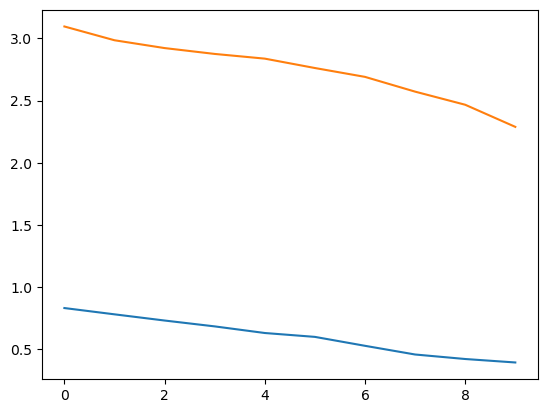

In [38]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend

In [40]:
n_past = 16
n_days_for_prediction=15  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Year':np.array(forecast_dates), 'Ireland_Public_Debt_Pc_of_GDP':y_pred_future})
df_forecast['Year']=pd.to_datetime(df_forecast['Year'])

original = data[['Year', 'Ireland_Public_Debt_Pc_of_GDP']]
#original['Year']=pd.to_datetime(original['Year'])
original = original.loc[original['Year']]

sns.lineplot(original['Year'], original['Ireland_Public_Debt_Pc_of_GDP'])

sns.lineplot(df_forecast['Year'], df_forecast['Ireland_Public_Debt_Pc_of_GDP'])
   


[Timestamp('1970-01-01 00:00:00.000002'), Timestamp('1970-01-02 00:00:00.000002'), Timestamp('1970-01-03 00:00:00.000002'), Timestamp('1970-01-04 00:00:00.000002'), Timestamp('1970-01-05 00:00:00.000002'), Timestamp('1970-01-06 00:00:00.000002'), Timestamp('1970-01-07 00:00:00.000002'), Timestamp('1970-01-08 00:00:00.000002'), Timestamp('1970-01-09 00:00:00.000002'), Timestamp('1970-01-10 00:00:00.000002'), Timestamp('1970-01-11 00:00:00.000002'), Timestamp('1970-01-12 00:00:00.000002'), Timestamp('1970-01-13 00:00:00.000002'), Timestamp('1970-01-14 00:00:00.000002'), Timestamp('1970-01-15 00:00:00.000002')]
1/1 [==============================] - 0s 27ms/step


KeyError: "None of [Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,\n       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,\n       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,\n       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],\n      dtype='int64')] are in the [index]"

In [43]:
print(y_pred_future)

[32.54935  30.151566 29.613968 30.075623 36.080708 38.86885  42.554276
 47.229225 49.60953  54.777786 59.646637 66.0383   70.78032  74.52842
 76.84162 ]


In [44]:
print(df_for_training)

    Ireland_Public_Debt_Pc_of_GDP  Denmark_Public_Debt_Pc_of_GDP  \
0                           41.65                          7.620   
1                           39.85                          7.720   
2                           37.34                          6.640   
3                           35.09                          5.850   
4                           43.45                          5.080   
5                           48.34                          4.260   
6                           51.70                          4.490   
7                           49.15                          8.780   
8                           50.65                         14.100   
9                           54.95                         19.370   
10                          56.06                         27.120   
11                          59.80                         36.520   
12                          63.77                         47.930   
13                          71.07               